## Import the necessary libraries

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Load the dataframe

In [48]:
data = pd.read_csv('Flair_data.csv')

In [123]:
data.head()

,flair,title,score,id,url,comms_num,created,body,author,comments,over_18
0,AskIndia,4 days ago we had pending orders of 100 millio...,97,fwjdqr,https://www.reddit.com/r/india/comments/fwjdqr...,6,1.586290e+09,> We are getting frantic calls from our pharma...,india_ko_vanakkam,"Modi has Stockholm syndrome To be fair, the e...",False
1,AskIndia,Randians who were big time users of dating app...,19,fizkkk,https://www.reddit.com/r/india/comments/fizkkk...,19,1.584298e+09,I'd my own stint with these apps(a couple of m...,__knockknockturnal__,Someone matched with me just to tell me that ...,False
2,AskIndia,What does r/India thinks about the Flat Earthers?,7,f25vx0,https://www.reddit.com/r/india/comments/f25vx0...,31,1.581441e+09,"I encountered a Foreigner in IG who says "" Rou...",Dev1003,I haven't found a Indian yet who believes ear...,False
3,AskIndia,People who left their 9 to 5 jobs to pursue a ...,45,dtvliq,https://www.reddit.com/r/india/comments/dtvliq...,34,1.573333e+09,Couldn't add AskIndia flair from the mobile br...,c0mrade34,"An Engineer, doing advertisement shoots since...",False
4,AskIndia,Somebody want to kill my full family what to do?,91,b7pvwt,https://www.reddit.com/r/india/comments/b7pvwt...,24,1.554080e+09,"It's now 24hrs, But local police station is no...",amitkumarthakur,"Calm down.\nGo to the SP office of your town,...",False


In [ ]:
data = data.drop(["Unnamed: 0"], axis = 1)
data.head()

Here we can see the various features for a particular post. 
### From now on I'll be calling the row for each post as a point.

In [243]:
(data.isnull().sum() / len(data)) * 100
# 42.2% of posts have no body
# 9.7% posts have no comments

flair           0
title           0
score           0
id              0
url             0
comms_num       0
created         0
body         1168
author          0
comments      269
over_18         0
dtype: int64

(-0.5, 1599.5, 799.5, -0.5)

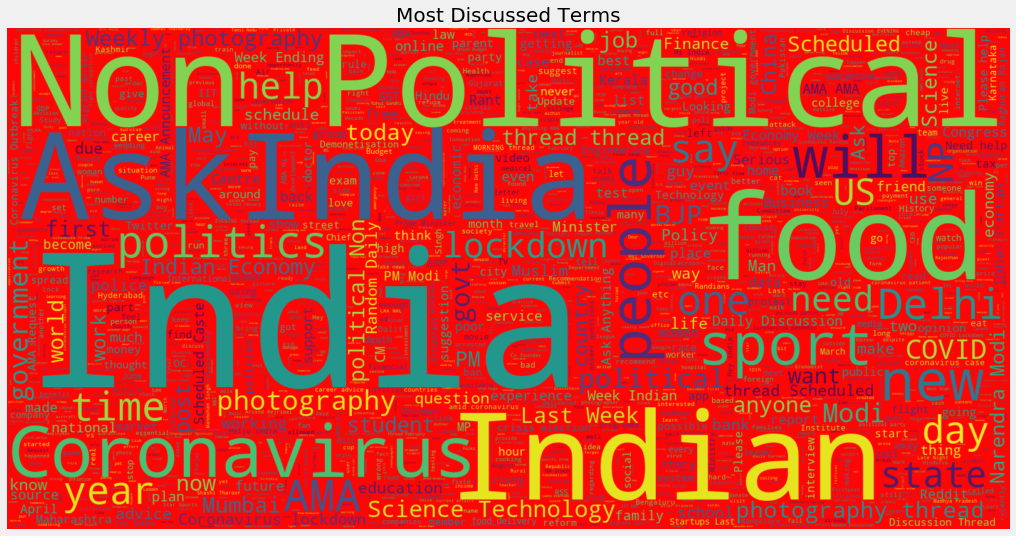

In [153]:
# import pip
# pip.main(['install', 'wordcloud'])

from wordcloud import WordCloud, STOPWORDS

# The wordcloud of Cthulhu/squidy thing for HP Lovecraft
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="red", stopwords = STOPWORDS, max_words=2000, max_font_size= 300,  width=1600, height=800)
wc.generate(" ".join(list(data['title'].values)))
plt.title("Most Discussed Terms", fontsize=20)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), alpha=0.98, interpolation="bilinear", )
plt.axis('off')

# Using the titles -> The most used words in the r/india posts
# India, Non-Political, Coronavirus, food, India, politics, lockdown, ....

In [52]:
#### STRUCTURE OF REDDIT POST   #####

In [53]:
data.columns  

Index(['flair', 'title', 'score', 'id', 'url', 'comms_num', 'created', 'body',
       'author', 'comments', 'over_18'],
      dtype='object')

We have collected the data for 13 flairs in total.
Let's observe the no. of data points flair wise.

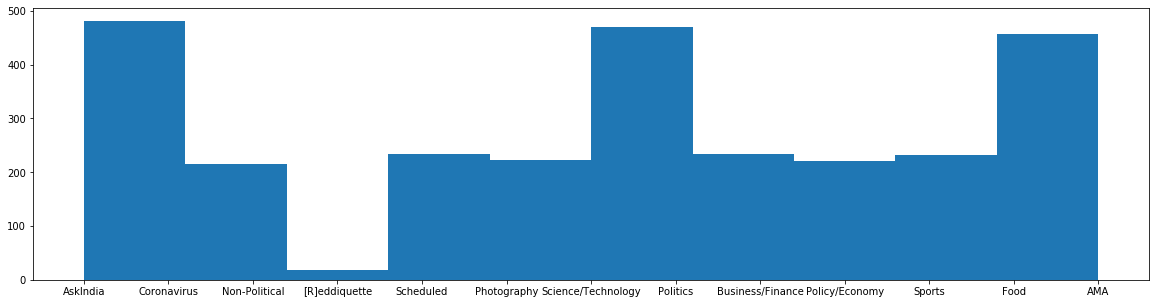

In [54]:
plt.figure(figsize=(20, 5))
plt.hist(data.flair)
plt.show()

In [55]:
#count no of points of each flair
flairs = ["AskIndia", "Coronavirus", "Non-Political", "[R]eddiquette", "Scheduled", "Photography", "Science/Technology",
          "Politics", "Business/Finance", "Policy/Economy", "Sports", "Food", "AMA"]
flair_count = [(i, len(data[data["flair"] == i])) for i in flairs]
flair_count

[('AskIndia', 232),
 ('Coronavirus', 249),
 ('Non-Political', 216),
 ('[R]eddiquette', 18),
 ('Scheduled', 234),
 ('Photography', 222),
 ('Science/Technology', 221),
 ('Politics', 249),
 ('Business/Finance', 233),
 ('Policy/Economy', 220),
 ('Sports', 232),
 ('Food', 244),
 ('AMA', 212)]

Here we can see that, all the flairs except - '[R]eddiquette' are greater than 200. 
For building the flair classification algo, we will remove the data points
corresponding to '[R]eddiquette'.

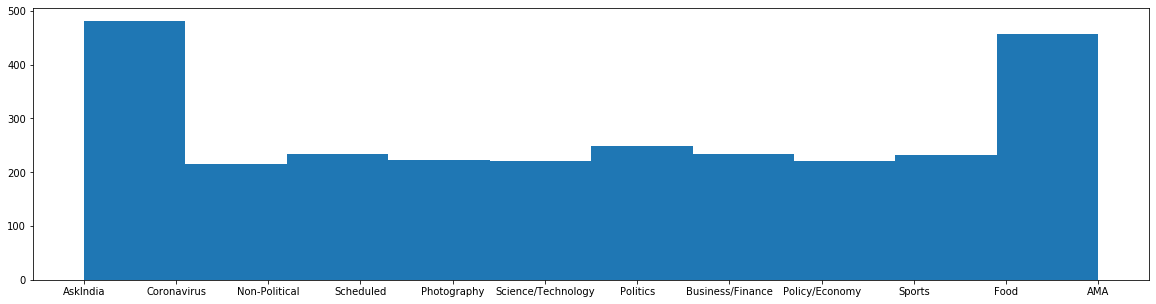

[('AskIndia', 232),
 ('Coronavirus', 249),
 ('Non-Political', 216),
 ('[R]eddiquette', 0),
 ('Scheduled', 234),
 ('Photography', 222),
 ('Science/Technology', 221),
 ('Politics', 249),
 ('Business/Finance', 233),
 ('Policy/Economy', 220),
 ('Sports', 232),
 ('Food', 244),
 ('AMA', 212)]

In [56]:
#Remove points correponding to
data = data[data["flair"] != "[R]eddiquette"]
plt.figure(figsize=(20, 5))
plt.hist(data.flair)
plt.show()
flair_count = [(i, len(data[data["flair"] == i])) for i in flairs]
flair_count

### Let's see those posts that are for adults -> over 18

In [57]:
data[data["over_18"] == True] # No NSFW Posts

,flair,title,score,id,url,comms_num,created,body,author,comments,over_18


In [282]:
print("No of NaN body posts {}".format(sum([data["body"].values[i] != data["body"].values[i] for i in range(len(data))])))
print("No of Deleted body posts {}".format(sum([data["body"].values[i] == '[deleted]' for i in range(len(data))])))
print("No of Removed  body posts {}".format(sum([data["body"].values[i] == '[removed]' for i in range(len(data))])))

No of NaN body posts 443
No of Deleted body posts 0
No of Removed  body posts 0


In [279]:
# Check for nan or deleted or removed 
# empties = ['nan', '[deleted]', '[removed]']
#The usual way to check for nan's is to compare by itself
#Fill empty body with ''
for i in range(len(data)):
    if(data["body"].iloc[i] != data["body"].iloc[i]):
        data["body"][i] = ''

In [287]:
print("No of NaN comments posts {}".format(sum([data["comments"].values[i] != data["comments"].values[i] for i in range(len(data))])))
print("No of Deleted comments posts {}".format(sum([data["comments"].values[i] == '[deleted]' for i in range(len(data))])))
print("No of Removed  comments posts {}".format(sum([data["comments"].values[i] == '[removed]' for i in range(len(data))])))

No of NaN comments posts 153
No of Deleted comments posts 0
No of Removed  comments posts 0


In [286]:
# Check for nan or deleted or removed 
# empties = ['nan', '[deleted]', '[removed]']
#The usual way to check for nan's is to compare by itself
#Fill empty body with ''
for i in range(len(data)):
    if(data["comments"].values[i] != data["comments"].values[i]):
        data["comments"][i] = ''

In [61]:
data.head()

,flair,title,score,id,url,comms_num,created,body,author,comments,over_18
0,AskIndia,4 days ago we had pending orders of 100 millio...,97,fwjdqr,https://www.reddit.com/r/india/comments/fwjdqr...,6,1.586290e+09,> We are getting frantic calls from our pharma...,india_ko_vanakkam,"Modi has Stockholm syndrome To be fair, the e...",False
1,AskIndia,Randians who were big time users of dating app...,19,fizkkk,https://www.reddit.com/r/india/comments/fizkkk...,19,1.584298e+09,I'd my own stint with these apps(a couple of m...,__knockknockturnal__,Someone matched with me just to tell me that ...,False
2,AskIndia,What does r/India thinks about the Flat Earthers?,7,f25vx0,https://www.reddit.com/r/india/comments/f25vx0...,31,1.581441e+09,"I encountered a Foreigner in IG who says "" Rou...",Dev1003,I haven't found a Indian yet who believes ear...,False
3,AskIndia,People who left their 9 to 5 jobs to pursue a ...,45,dtvliq,https://www.reddit.com/r/india/comments/dtvliq...,34,1.573333e+09,Couldn't add AskIndia flair from the mobile br...,c0mrade34,"An Engineer, doing advertisement shoots since...",False
4,AskIndia,Somebody want to kill my full family what to do?,91,b7pvwt,https://www.reddit.com/r/india/comments/b7pvwt...,24,1.554080e+09,"It's now 24hrs, But local police station is no...",amitkumarthakur,"Calm down.\nGo to the SP office of your town,...",False


In [65]:
#For Flair "AskIndia" -> we can see details for a total of 232 posts
#mean of scores is 114
#mean of no. of comments on posts is 145 comments
data[data["flair"] == "AskIndia"].describe()

,score,comms_num,created
count,232.000000,232.000000,2.320000e+02
mean,114.875000,145.724138,1.547789e+09
std,1172.090254,1042.109753,4.817256e+07
min,0.000000,0.000000,1.346567e+09
25%,7.000000,6.000000,1.545548e+09
50%,16.000000,15.000000,1.560927e+09
75%,41.000000,38.250000,1.576318e+09
max,17860.000000,10945.000000,1.586837e+09


In [67]:
data[data["flair"] == "Food"].describe()  
#If we see the comparision between "Food" and "AskIndia" (though no. of posts are no the same for these flairs)
# We can say that - since no. of comments on "Food" is less than that on "AskIndia", 
# People are less talking about Food.

,score,comms_num,created
count,244.000000,244.000000,2.440000e+02
mean,264.270492,55.446721,1.583182e+09
std,826.141749,168.623601,4.388408e+06
min,0.000000,0.000000,1.564883e+09
25%,23.750000,4.000000,1.582083e+09
50%,65.500000,16.000000,1.585146e+09
75%,233.750000,43.000000,1.585787e+09
max,10047.000000,1430.000000,1.587086e+09


In [68]:
data['id'].isna().sum()   
#So there are no null values present in the id column

0

# Title Column Analysis

In [69]:
data.title.isna().sum()  #No null value in data
# If some null value
# data[data.title.isna()] #Check location using

0

# Score Column

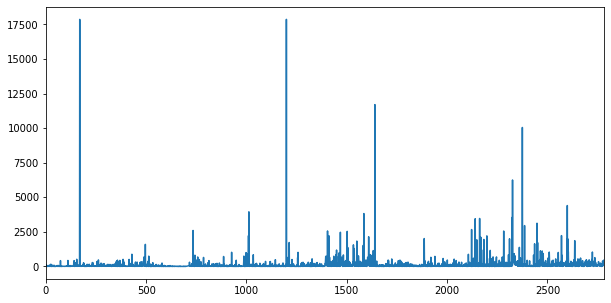

In [103]:
plt.figure(figsize=(10, 5))
data.score.plot()
plt.show()

In [70]:
print("The minimum and the maximum score awarded are :",data.score.min(),'-',data.score.max())

The minimum and the maximum score awarded are : 0 - 17863


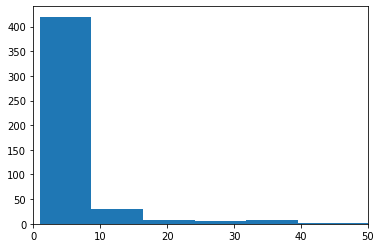

668 Posts with less than 10 votes
2041 Posts with more than 10 votes


In [96]:
plt.xlim(0, 50)
plt.hist(data.score.value_counts())
plt.show()

#Score to most of the posts is in the range of 0 - 10

In [97]:
print(len(data[data['score'] < 10]), 'Posts with less than 10 votes')
print(len(data[data['score'] > 10]), 'Posts with more than 10 votes')

668 Posts with less than 10 votes
2041 Posts with more than 10 votes


In [99]:
#Post with most score <Haha>
data[data['score'] == data['score'].max()]['title'].iloc[0]

#People are becoming Atheist or Agnostic? <haha> - https://www.quora.com/What-do-you-call-someone-who-does-not-believe-in-religion

'Fuck all Religion'

In [104]:
#Post with min score <Haha>
data[data['score'] == data['score'].min()]['title'].iloc[0]

'[AskIndia] Cingari, Cengar or Tzengar?'

In [109]:
most_popular = data.sort_values('score',ascending=False)[['score','title']].head(10)

most_popular.score

1199    17863
169     17860
1640    11700
2375    10047
2326     6251
2599     4403
1012     3948
1585     3824
2324     3544
2162     3469
Name: score, dtype: int64

In [110]:
# style.available
style.use('fivethirtyeight')

Text(0.5, 1.0, 'Most popular posts')

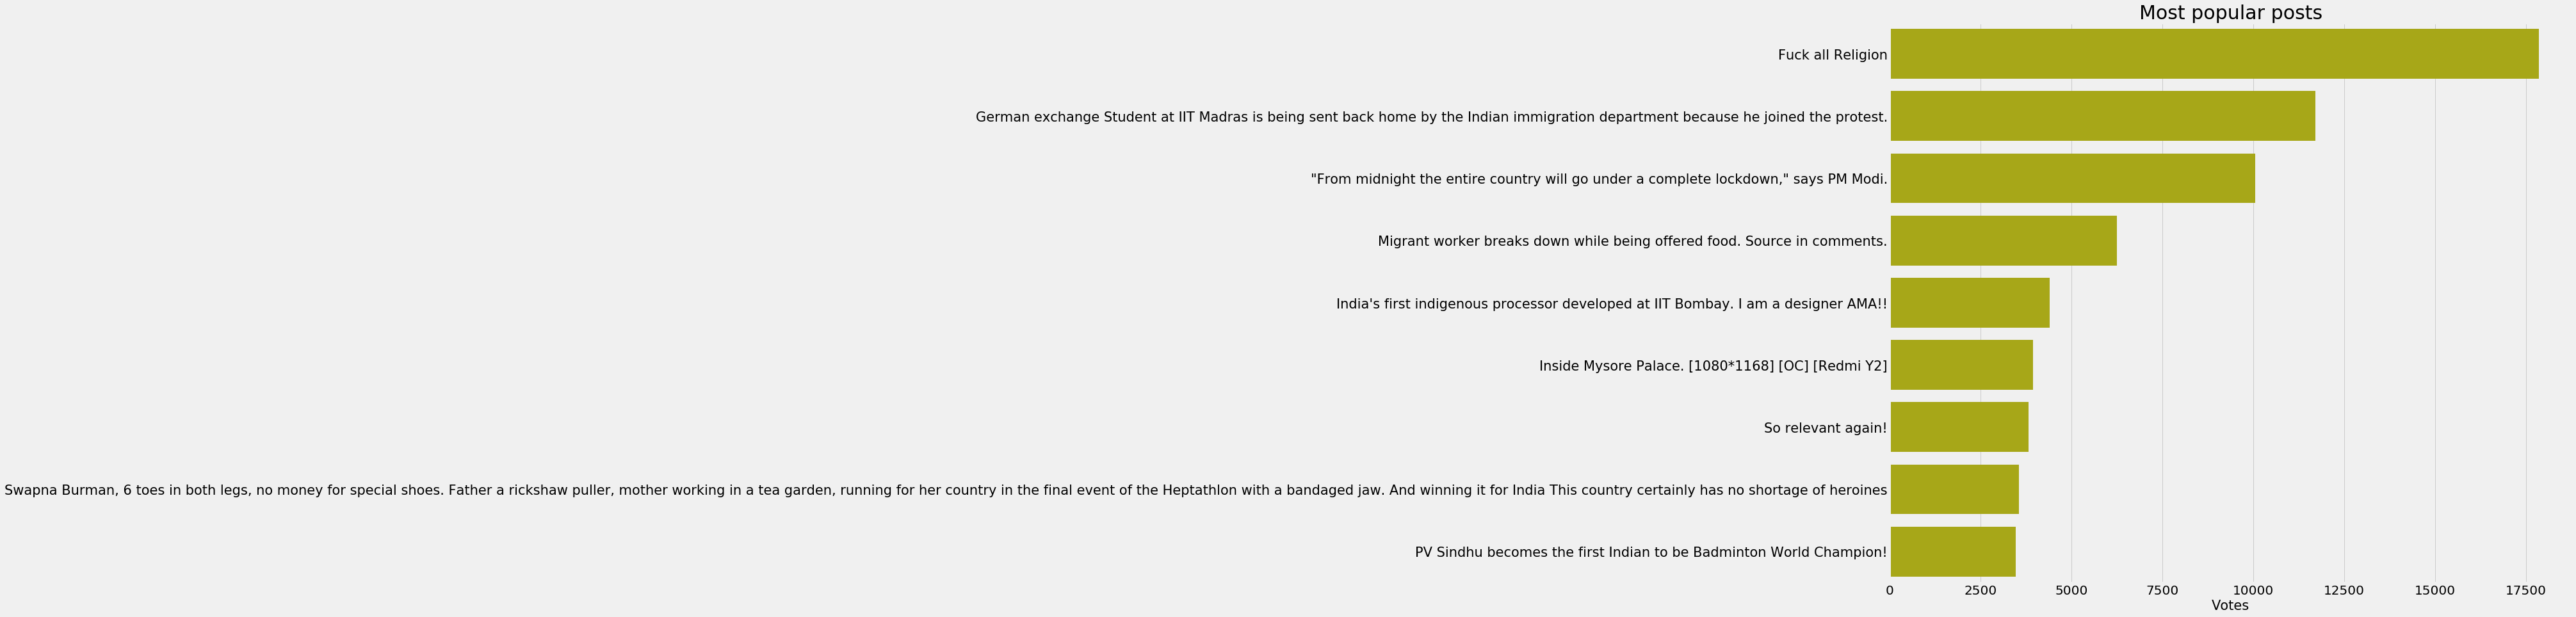

In [119]:
plt.figure(figsize = (17,15))

sns.barplot(data = most_popular, y = 'title', x = 'score', color = 'y')
plt.xticks(fontsize = 20, rotation = 0)
plt.yticks(fontsize = 21, rotation = 0)
plt.xlabel('Votes', fontsize = 21)
plt.ylabel('')
plt.title('Most popular posts', fontsize = 30)

# Comments

In [98]:
print(len(data[data['comms_num'] < 10]), 'Posts with less than 10 comments')
print(len(data[data['comms_num'] > 10]), 'Posts with more than 10 comments')

1235 Posts with less than 10 comments
1465 Posts with more than 10 comments


In [114]:
popular_comments = data.sort_values('comms_num',ascending=False)[['author','title','comms_num']].head(12)
popular_comments.comms_num

141     10945
154     10838
169      4198
1199     4198
2597     2600
1475     2279
2609     2226
2375     1430
1227     1402
2602     1312
2426     1301
2523     1061
Name: comms_num, dtype: int64

Text(0.5, 1.0, 'Most commented posts')

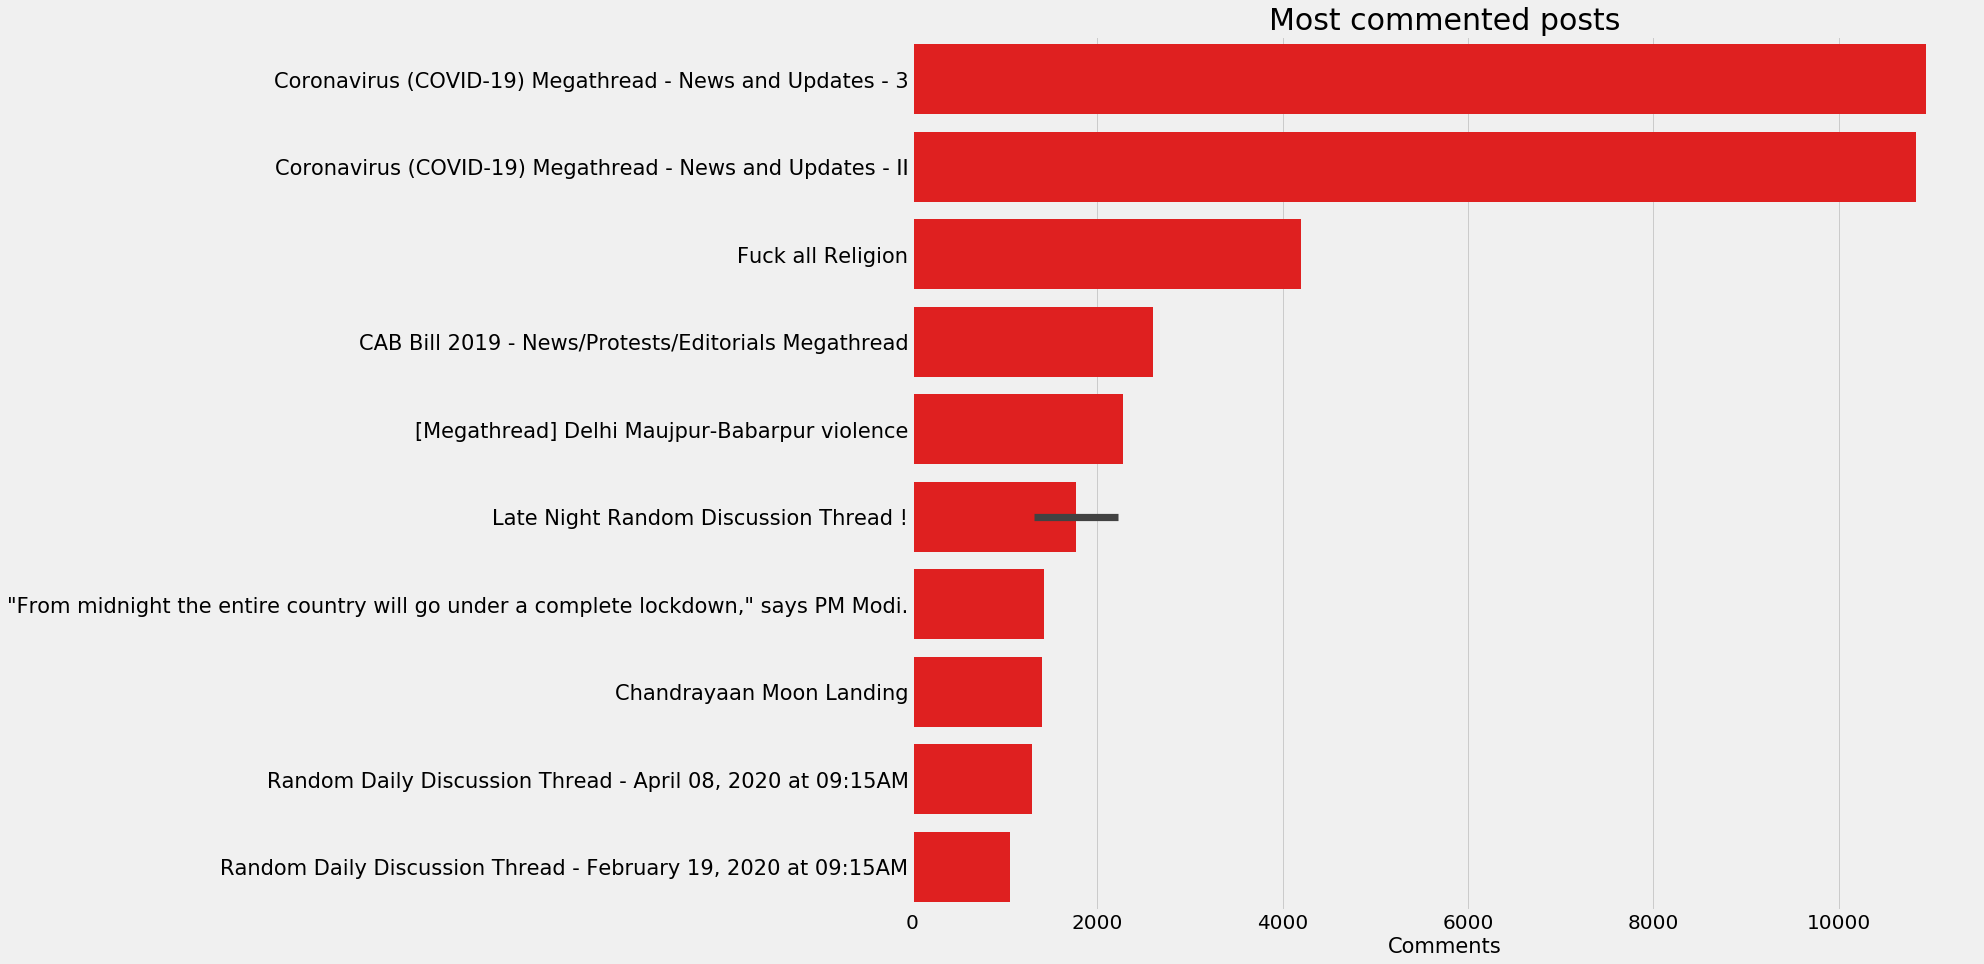

In [117]:
plt.figure(figsize = (17,15))

sns.barplot(data = popular_comments, y = 'title', x = 'comms_num', color = 'r')
plt.xticks(fontsize = 20, rotation = 0)
plt.yticks(fontsize = 21, rotation = 0)
plt.xlabel('Comments', fontsize = 21)
plt.ylabel('')
plt.title('Most commented posts', fontsize = 30)

No. of Comments vs Score per flair

People are more talking Non-Political than Political,
Largely People are talking of Coronavirus

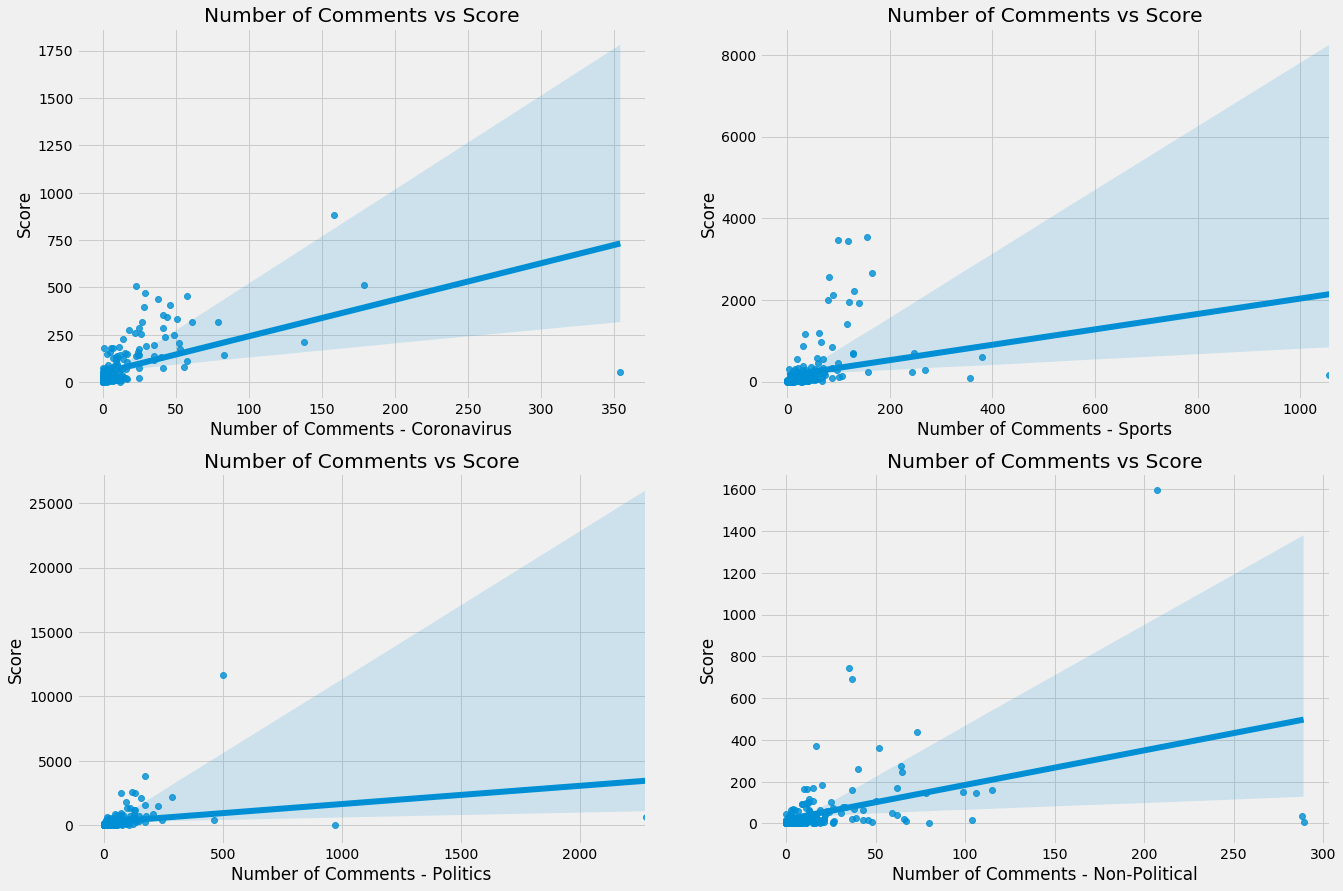

In [173]:
#Regression Plots
plt.figure(figsize=(20,14))

plt.subplot(221)
sns.regplot(x = 'comms_num', y = 'score', data = data[data['flair'] == 'Coronavirus'])
plt.title('Number of Comments vs Score')
plt.xlabel('Number of Comments - Coronavirus')
plt.ylabel('Score')

plt.subplot(222)
sns.regplot(x = 'comms_num', y = 'score', data = data[data['flair'] == 'Sports'])
plt.title('Number of Comments vs Score')
plt.xlabel('Number of Comments - Sports')
plt.ylabel('Score')


plt.subplot(223)
sns.regplot(x = 'comms_num', y = 'score', data = data[data['flair'] == 'Politics'])
plt.title('Number of Comments vs Score')
plt.xlabel('Number of Comments - Politics')
plt.ylabel('Score')

plt.subplot(224)
sns.regplot(x = 'comms_num', y = 'score', data = data[data['flair'] == 'Non-Political'])
plt.title('Number of Comments vs Score')
plt.xlabel('Number of Comments - Non-Political')
plt.ylabel('Score')

plt.show()

# Author Column

In [100]:
data.author.value_counts()

AutoModerator           57
hipporama               25
satyasys                24
DexterMilburn           23
ppatra                  21
madamplease             19
indianstartupguy        17
Neglectedsince1994      17
nosleepnomore           16
rahulthewall            16
Gavthi_Batman           15
india_ko_vanakkam       15
cncrndctzn2             13
HornOK                  13
sudden_dust             12
InternetFreedomIn       12
iali307                 11
dlisfyn                 10
neoronin                10
vv4life                  9
doc_two_thirty           9
in3po                    9
Ajaatshatru34            9
IAmMohit                 9
thelielmao               8
BabaGyaanchod            8
axaytsg                  8
aviakki1                 8
oxythebot                8
thewebdev                8
                        ..
bunnykumarxyz            1
Nishchay_Ghadge          1
Invincible_XI            1
maneonlyintense          1
ramanujam                1
maverick8496             1
B

Text(0, 0.5, 'Number of titles')

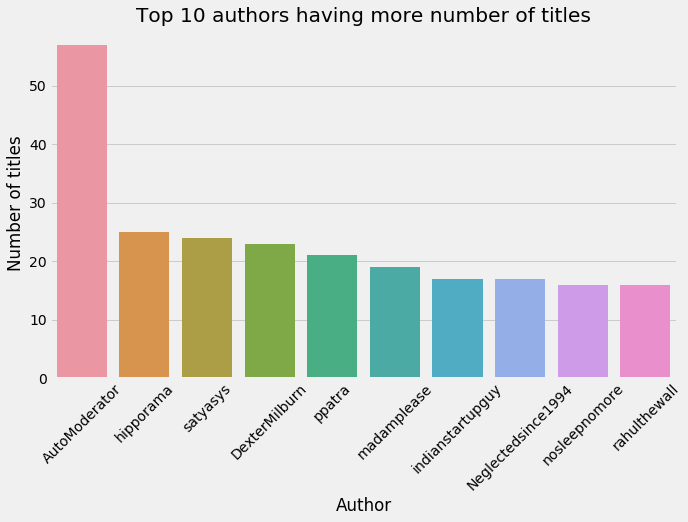

In [156]:
plt.figure(figsize = (10,6))
chart = sns.countplot(x = 'author', data = data, 
                      order = data.author.value_counts().iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Top 10 authors having more number of titles')
plt.xlabel('Author')
plt.ylabel('Number of titles')

# Analysis of text
We can see the columns of data available to us. But the most important part of data is the text data. 
We have title, body and the comments on the posts.

In [404]:
X = data.drop(["flair"], axis = 1)
Y = data["flair"]

In [405]:
print(X.title.iloc[0])

4 days ago we had pending orders of 100 million hydroxychloroquine tablets which had been placed by state run hospitals, now suddenly we have enough of these tablets to suit the regime's agenda.


In [406]:
print(X.body.iloc[0])

> We are getting frantic calls from our pharma customers for their delayed cargo, but we really can’t help as there are last-minute cancellations,” said a freight company executive. Several state-run hospitals have placed orders for over 100 million hydroxychloroquine tablets, which drug companies say are pending as outstanding orders. This drug is also used by patients suffering from lupus, an autoimmune disease, and is reported to be in shortage in pharmacies.


[Covid-19: Indian pharma companies want government to airlift APIs from China](https://economictimes.indiatimes.com/industry/healthcare/biotech/pharmaceuticals/drug-cos-want-govt-to-airlift-apis-from-china/articleshow/74956938.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst)

Now we according to RW spin master journalists we have enough. 

> Samir Saran (ORF): Take a chill pill, give #Hydroxycloroquine, they had paid for it & we have enough. They are good people and partners- #US. In fact as they peak and 

In [407]:
print(X.comments.iloc[0])

 Modi has Stockholm syndrome To be fair, the evidence that chloroquine works is anecdotal and not scientifically proven. The entire Story has emerged from some right wing corner in the US. A Trump supporting couple self prescribed themselves chloroquine after Trump described it as a 'miracle'. The man died and the woman was admitted to intensive care.

Best to placate Trump by giving him his snake oil and keep enough for our reasonable internal use instead of stockpiling. Next thing you know he's threatening 3M India and they stop making N95 masks. It's just Trump's and mudis pr stunt


In [408]:
print(Y.iloc[0])

AskIndia


We can see that the text data contains a lot of special characters, links, emojis, brackets, pucntuations, <br >
and other characters. <br>
We need to clean this text..

In [431]:
import re  #Regular expressions
from nltk.corpus import stopwords  #Stop words are words that generally occur in the sentences.
                                   #These generally are redundant/not required in machine learning text classification
from bs4 import BeautifulSoup
import string

## Define functions for text cleaning

In [410]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def get_date(created):
    return dt.datetime.fromtimestamp(created)

def string_form(value):
    return str(value)

def clean_text(text):
    text = string_form(text)
    text = BeautifulSoup(text, "lxml").text
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
#     text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

In [411]:
print(X.title.iloc[0])
print(clean_text(X.title.iloc[0]))

4 days ago we had pending orders of 100 million hydroxychloroquine tablets which had been placed by state run hospitals, now suddenly we have enough of these tablets to suit the regime's agenda.
4 days ago we had pending orders of 100 million hydroxychloroquine tablets which had been placed by state run hospitals  now suddenly we have enough of these tablets to suit the regimes agenda


In [412]:
X.head(2)

,title,score,id,url,comms_num,created,body,author,comments,over_18
0,4 days ago we had pending orders of 100 millio...,97,fwjdqr,https://www.reddit.com/r/india/comments/fwjdqr...,6,1.586290e+09,> We are getting frantic calls from our pharma...,india_ko_vanakkam,"Modi has Stockholm syndrome To be fair, the e...",False
1,Randians who were big time users of dating app...,19,fizkkk,https://www.reddit.com/r/india/comments/fizkkk...,19,1.584298e+09,I'd my own stint with these apps(a couple of m...,__knockknockturnal__,Someone matched with me just to tell me that ...,False


## Let's add some text features, to train a classifier using these features, <br>
## without using the text

In [413]:
X["over_18"] = X["over_18"].apply(lambda x: 1 if x == True else 0)

X["comms_num"] = X["comms_num"].apply(lambda x: float(x))

X["score"] = X["score"].apply(lambda x: float(x))

X["num_words"] = X["title"].apply(lambda x: len(str(x).split()))

X["num_unique_words"] = X["title"].apply(lambda x: len(set(str(x).split())))

X["num_chars"] = X["title"].apply(lambda x: len(str(x)))

X["num_stopwords"] = X["title"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

X["num_punctuations"] =X['title'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

X["num_words_upper"] = X["title"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

X["num_words_title"] = X["title"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

X["mean_word_len"] = X["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [414]:
X.head(1)

,title,score,id,url,comms_num,created,body,author,comments,over_18,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len
0,4 days ago we had pending orders of 100 millio...,97.0,fwjdqr,https://www.reddit.com/r/india/comments/fwjdqr...,6.0,1.586290e+09,> We are getting frantic calls from our pharma...,india_ko_vanakkam,"Modi has Stockholm syndrome To be fair, the e...",0,33,29,194,14,3,0,0,4.909091


In [415]:
#Converting Flair to One-Hot
label_encode_dict = {'AskIndia': 0,
                         'Coronavirus': 1,
                         'Non-Political': 2,
                         'Scheduled': 3,
                         'Photography': 4,
                         'Science/Technology': 5,
                         'Politics': 6,
                         'Business/Finance': 7,
                         'Policy/Economy': 8,
                         'Sports': 9,
                         'Food': 10,
                         'AMA': 11}
Y = Y.map(label_encode_dict)

In [416]:
X.columns

Index(['title', 'score', 'id', 'url', 'comms_num', 'created', 'body', 'author',
       'comments', 'over_18', 'num_words', 'num_unique_words', 'num_chars',
       'num_stopwords', 'num_punctuations', 'num_words_upper',
       'num_words_title', 'mean_word_len'],
      dtype='object')

In [417]:
X = X.drop(["title", "id", "url", "created", "body", 'author', "comments"], axis = 1)

In [418]:
X.head(2)

,score,comms_num,over_18,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,num_words_title,mean_word_len
0,97.0,6.0,0,33,29,194,14,3,0,0,4.909091
1,19.0,19.0,0,19,19,104,5,3,0,3,4.526316


### Training a simple XGBoost Classfier

In [423]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state = 0)
#Training a simple XGBoost
import xgboost as xgb
from xgboost import XGBClassifier

classifier = XGBClassifier()
classifier.fit(X_train, Y_train)

### Confusion matrix 

In [425]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)

confusion_matrix(Y_test, y_pred)

array([[13,  0,  7,  1,  2,  3,  2,  1,  3,  3,  2,  5],
       [ 1, 24,  0,  2,  1,  4,  3,  3,  3,  5,  2,  2],
       [ 8,  2, 16,  1,  5,  5,  1,  4,  1,  3,  4,  1],
       [ 3,  8,  0, 16,  1,  6,  2,  2,  3,  3,  4,  1],
       [ 4,  2,  2,  8, 19,  1,  3,  4,  3,  6,  3,  1],
       [ 4,  6,  3,  5,  1,  2,  2,  3,  6,  5,  4,  1],
       [ 0,  7,  2,  2,  1,  1,  8,  5,  5,  4,  8,  1],
       [ 4,  2,  0,  2,  1,  6,  1, 12,  5,  2,  3,  0],
       [ 5,  3,  1,  5,  1,  2,  3,  5,  3,  5,  4,  3],
       [ 6,  8,  1,  6,  6,  3,  0,  4,  1,  5,  5,  2],
       [ 1,  8,  1,  3,  1,  1,  8,  2,  1,  7, 12,  2],
       [ 2,  1,  2,  2,  1,  2,  4,  1,  2,  1,  0, 29]])

### Feature Importance

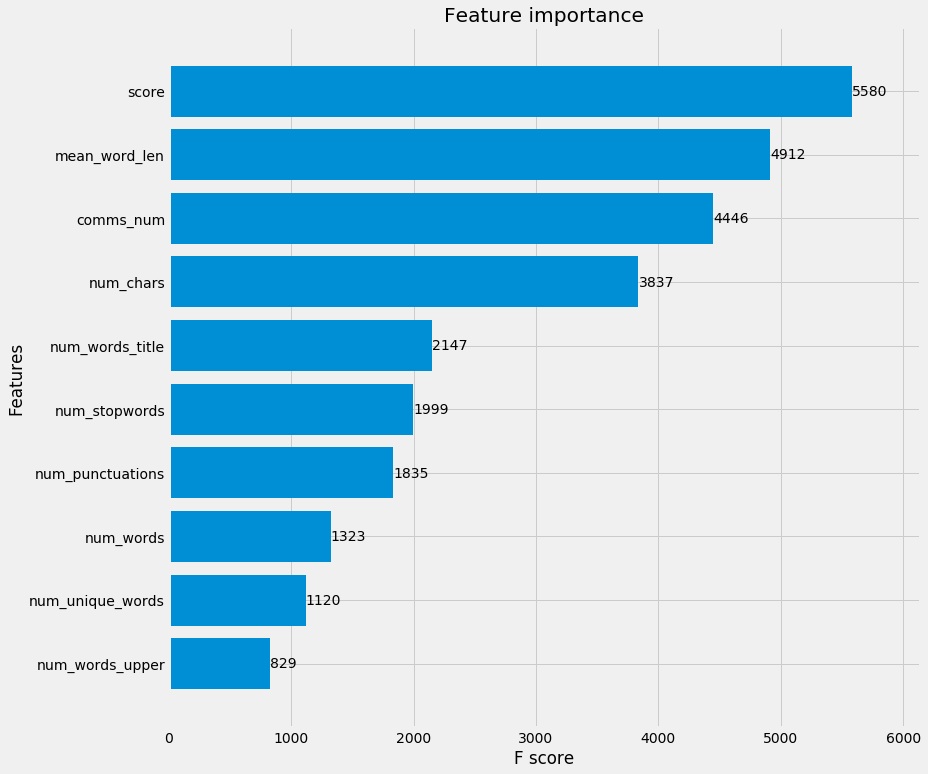

In [426]:
fig, ax = plt.subplots(figsize=(12,12))
xgb.plot_importance(classifier, max_num_features=50, height=0.8, ax=ax)
plt.show()

### Accuracy is very less. These features are not of much importance for classification

In [427]:
def accuracy(out, labels):
    count = 0
    for i,j in zip(out,labels):
        if i == j:
            count += 1
    return (count/len(labels)) * 100

In [428]:
print ('Accuracy on test set using meta features', accuracy(Y_test, y_pred), '%')

Accuracy on test set using meta features 28.75226039783002 %


## Lets see BoW (BAG OF WORDS) for two posts of the same flair

In [441]:
post_textA = data["title"].values[0] + data["body"].values[0] + data["comments"].values[0]
post_textB = data["title"].values[1] + data["body"].values[1] + data["comments"].values[1]

In [442]:
post_textA

"4 days ago we had pending orders of 100 million hydroxychloroquine tablets which had been placed by state run hospitals, now suddenly we have enough of these tablets to suit the regime's agenda.> We are getting frantic calls from our pharma customers for their delayed cargo, but we really can’t help as there are last-minute cancellations,” said a freight company executive. Several state-run hospitals have placed orders for over 100 million hydroxychloroquine tablets, which drug companies say are pending as outstanding orders. This drug is also used by patients suffering from lupus, an autoimmune disease, and is reported to be in shortage in pharmacies.\n\n\n[Covid-19: Indian pharma companies want government to airlift APIs from China](https://economictimes.indiatimes.com/industry/healthcare/biotech/pharmaceuticals/drug-cos-want-govt-to-airlift-apis-from-china/articleshow/74956938.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst)\n\nNow we according to RW spin master

In [446]:
post_textA = clean_text(post_textA)  #Clean text
post_textB = clean_text(post_textB)
post_textA

'4 days ago we had pending orders of 100 million hydroxychloroquine tablets which had been placed by state run hospitals  now suddenly we have enough of these tablets to suit the regimes agenda we are getting frantic calls from our pharma customers for their delayed cargo  but we really cant help as there are lastminute cancellations  said a freight company executive several staterun hospitals have placed orders for over 100 million hydroxychloroquine tablets  which drug companies say are pending as outstanding orders this drug is also used by patients suffering from lupus  an autoimmune disease  and is reported to be in shortage in pharmacies covid19 indian pharma companies want government to airlift apis from china  https  economictimesindiatimescom industry healthcare biotech pharmaceuticals drugcoswantgovttoairliftapisfromchina articleshow 74956938cmsutm_sourcecontentofinterestutm_mediumtextutm_campaigncppst now we according to rw spin master journalists we have enough  samir saran

In [447]:
#Take words
bagOfWordsA = post_textA.split(' ')
bagOfWordsB = post_textB.split(' ')

#### By casting the bag of words to a set, we can automatically remove any duplicate words.

In [448]:
uniqueWords = set(bagOfWordsA).union(set(bagOfWordsB))
uniqueWords

{'',
 '#hydroxychloriquine',
 '#hydroxycloroquine',
 '#us',
 '+',
 '1',
 '10',
 '100',
 '1247366011822596100',
 '1247378421186953216usa',
 '1247391121191227393',
 '2',
 '23',
 '3',
 '34',
 '3m',
 '4',
 '74956938cmsutm_sourcecontentofinterestutm_mediumtextutm_campaigncppst',
 '75',
 'a',
 'about',
 'according',
 'achievementi',
 'across',
 'action',
 'aditya',
 'adityarajkaul',
 'admitted',
 'after',
 'agenda',
 'ago',
 'aint',
 'airlift',
 'allyhttps',
 'also',
 'am',
 'an',
 'and',
 'anecdotal',
 'any',
 'anywhere',
 'apis',
 'applies',
 'apps',
 'are',
 'arent',
 'articleshow',
 'as',
 'asked',
 'askindia',
 'at',
 'atmostcat',
 'attract',
 'aunties',
 'autoimmune',
 'average',
 'away',
 'be',
 'become',
 'been',
 'being',
 'better',
 'big',
 'biotech',
 'blame',
 'body',
 'bother',
 'bots',
 'bumble',
 'but',
 'by',
 'calls',
 'can',
 'cancellations',
 'cant',
 'capacity',
 'carebest',
 'cargo',
 'cat',
 'cause',
 'chill',
 'china',
 'chloroquine',
 'come',
 'comfortable',
 'compani

#### Dictionary of words and their occurence for each post document 

In [449]:
numOfWordsA = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsA:
    numOfWordsA[word] += 1
    
numOfWordsB = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsB:
    numOfWordsB[word] += 1

In [460]:
#Count of words in 2 different posts
print("key Num_A  Num_B")
for key in numOfWordsA.keys():
    print(str(key) + " " + str(numOfWordsA.get(key)) + " " + str(numOfWordsB.get(key)) )

key Num_A  Num_B
 26 25
journalists 1 0
come 0 1
government 1 0
also 1 0
odds 0 1
meetingalso 0 1
true 0 1
indian 1 1
covid19 1 0
filter 0 1
shortage 1 0
adityarajkaul 1 0
profiles 0 2
stopped 0 1
new 1 0
try 0 2
needed 1 0
feel 0 5
applies 0 1
same 0 2
prefer 0 1
was 1 1
woman 1 0
meeting 0 1
taking 0 1
got 0 1
hide 0 1
regularly 0 1
when 1 3
obvious 0 1
matches 0 2
74956938cmsutm_sourcecontentofinterestutm_mediumtextutm_campaigncppst 1 0
raj 1 0
well 1 1
carebest 1 0
placate 1 0
will 1 0
with 5 5
nasty 1 0
works 1 0
2 0 2
are 5 3
story 1 1
fake 0 1
average 0 1
country 0 2
women 0 7
imbalanced 0 1
indias 1 0
aunties 0 1
lack 0 1
days 1 2
still 1 1
apis 1 0
too 0 3
many 0 1
whats 0 1
respects 1 0
production 1 0
havent 0 1
no 0 2
though 0 1
asked 1 0
pharmaceuticals 1 0
right 1 2
were 0 1
less 0 1
to 8 12
hydroxychloroquine 2 0
supplies 1 0
3m 1 0
much 1 2
them 0 4
wrongly 0 1
internal 1 0
apps 0 4
govt 1 0
twittercom 3 0
want 1 1
tablets 3 0
jibes 1 0
away 1 0
threatened 1 0
modi 1 0
l